**IF YOU WANT TO TEST THIS COMPLETE WORKING OF THE OBJECT DETECTION CODE PLEASE EXECUTE IN GOOGLE COLAB BECAUSE IT GIVES FASTER GPU AND LINUX VM FOR FASTER EXECUTION.**    

LINK FOR GOOGLE COLAB--> https://colab.research.google.com/   

UPLOAD THE NOTEBOOK TO COLAB GO TO (**File-->upload notebook**) and upload the downloaded notebook.

ONE MAIN THING SELECT RUNTIME TO GPU on top select(**Runtime-->change runtime type-->GPU-->Save**)

AFTER DOING ALL THE CHANGES JUST EXECUTE/RUN THE CODE BLOCK BY BLOCK :)

In [ ]:
#importing all the necessary libraries
import numpy as np
import cv2
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import glob
import time
from termcolor import cprint
%matplotlib inline
from array import array

from google.colab import files,drive
from google.colab.patches import cv2_imshow

In [ ]:
rm -rf ../../yolov4_final

In [ ]:
class FolderSetup:
  def main():
    '''
    Input:None
    Output:New folder created called yolov4_final inside the google-drive
    description:The main() function helps us to make directories in which all the files and folder will be saved
    
    written buy:Rohan Patankar
    '''
    drive.mount('/content/drive') #mounting to drive so that we can access all the files from drive
    os.chdir("/content/drive/MyDrive/")
    os.makedirs("yolov4_final",exist_ok=True)
    cprint("main directory created successfully","green",attrs=["bold"])
    path="yolov4_final"
    dir=os.path.join(os.getcwd(),path)
    cprint(f"Changing directory from {os.getcwd()} to {dir}","yellow",attrs=["bold"])
    os.chdir(dir)
    cprint("displaying the gpu availables","green",attrs=["bold"])
    !nvidia-smi #displaying the available gpu on the colab virtual machine
FolderSetup.main()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
main directory created successfully
Changing directory from /content/drive/MyDrive to /content/drive/MyDrive/yolov4_final
displaying the gpu availables
Wed Aug 24 18:34:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 1

In [ ]:
class MakeDarknet:
    def make_darknet():
      '''
      Input:None
      output:downloaded files from google drive for predictions
      description:The make_darknet() function will download all the essential files and folder which is required for our object detection.

      witten by:Rohan Patankar
      '''
      cprint("Downloading the essential files","yellow",attrs=["bold"])
      !gdown --id 1NfmcaRDoMmt5h7blo4GJdAjxd8zeH-S7
      cprint("unzipping","green",attrs=["bold"])
      !unzip darknet.zip
      cprint("changing directory to darknet","green",attrs=["bold"])
      %cd darknet
      cprint("Changing permissions","yellow")
      !chmod +x ./darknet
      cprint("successfully executed","green")
MakeDarknet.make_darknet()

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1NfmcaRDoMmt5h7blo4GJdAjxd8zeH-S7
To: /content/drive/MyDrive/yolov4_final/darknet.zip
100% 453M/453M [00:02<00:00, 178MB/s]
unzipping
Archive:  darknet.zip
  inflating: darknet/train.txt       
  inflating: darknet/test.txt        
replace darknet/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: darknet/LICENSE         
  inflating: darknet/chart.png       
  inflating: darknet/uselib          
  inflating: darknet/chart_yolov4-custom.png  
  inflating: darknet/video_yolov4.sh  
  inflating: darknet/DarknetConfig.cmake.in  
  inflating: darknet/net_cam_v3.sh   
  inflating: darknet/image_yolov4.sh  
  inflating: darknet/bad.list        
  inflating: darknet/build.ps1       
  inflating: darknet/Makefil

In [ ]:
class YOLO:
    def test(self,enter_image_name:str):
      '''
      Input:image name 
      Output:Predicted image inside darknet/dest/ folder
      description:The test() function predicts the number plates and save the predicted image to darknet/dest/ folder

      written by:Rohan Patankar
      '''
      try:
        self.dir=glob.glob("result_img/*jpg")
        for rm_files in (self.dir):
          os.remove(rm_files)
        cprint("Processing...",'green',attrs=["bold"])
        !./darknet detector test data/main.data cfg/yolov4-custom.cfg /content/drive/MyDrive/yolov4_final/darknet/backup/yolov4-custom_best.weights data/test_data/{enter_image_name} -thresh 0.3 -dont_show -map
        self.image=cv2.imread("predictions.jpg")
        os.makedirs("dest",exist_ok=True)
        cv2.imwrite(f"dest/{enter_image_name}",self.image)
        os.remove("predictions.jpg")
      except Exception as e:
        raise e

    def imshow(self,enter_image_name:str):
      '''
        Input:image name
        Output:number of license plates in an image and detected license plate image
        description:The imshow() function shows the predicted image and also the total no.of license plates present in the particular predicted image

        Written by:Rohan Patankar
      '''
      try:
        # img_to_show=os.listdir("dest")[-1]
        cprint(f"Loading {enter_image_name}...","yellow",attrs=["bold"])
        self.image=cv2.imread(f"dest/{enter_image_name}")
        self.height,self.width=self.image.shape[:2]
        self.resized_image=cv2.resize(self.image,(3*(self.width),3*(self.height)),interpolation=cv2.INTER_CUBIC)
        self.fig=plt.gcf()
        self.fig.set_size_inches(10,10)
        plt.axis('off')
        plt.imshow(cv2.cvtColor(self.resized_image,cv2.COLOR_BGR2RGB))
        plt.show()
        cprint("\nSHOWING TOTAL NUMBER OF LICENSE PLATES IN DETECTED IMAGE...","blue",attrs=["underline"])
        self.dir=glob.glob("result_img/*.jpg")
        self.imgs=[]
        for img in (self.dir):
          self.imgs.append(img)
          self.image = cv2.imread(img)
          self.original=self.image.copy()
          cv2_imshow(self.original)   
        a="are" if len(self.imgs)>1 else "is"
        cprint(f"There {a} {len(self.imgs)} plates in the detected image...","yellow",attrs=["bold"])
        cprint("Processed image saved successfully to darknet/dest folder...\n\n","green",attrs=["bold"])
      except Exception as e:
        raise e

    def RGB2HEX(self,color:array):
      '''
        Input: int[] example [255,255,0]
        Output:hexadecimal color code
        description:The RGB2HEX() converts array of 3 integers to hexadicimal color code.

        Written by:Rohan Patankar
      '''
      try:
        return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
      except Exception as e:
        raise e
      
    def get_image(self,image_path:str):
      '''
        Input: image_path or image name with image extension eg:1.jpg
        Output:converted image from BGR TO RGB
        description:the get_image() is used to convert the input image from bgr to rgb

        Written by:Rohan Patankar
      '''
      try:
        self.image = cv2.imread(image_path)
        self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        return self.image
      except Exception as e:
        raise e

    def get_colors(self,image:str, number_of_colors:int, show_chart:bool):
      '''
        Input: image_name,no.of colors needed to extract int(),show_chart Boolean  
        Output: pie chart which shows variety of colors that are present in an image
        description:The get_colors() takes an image and gives pie-chart as an output with all the colors that are available in an image.

        Written by:Rohan Patankar
      '''
      try:
        self.modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
        self.modified_image = self.modified_image.reshape(self.modified_image.shape[0]*self.modified_image.shape[1], 3)
        self.clf = KMeans(n_clusters = number_of_colors)
        self.labels = self.clf.fit_predict(self.modified_image)
        self.counts = Counter(self.labels)
        self.center_colors = self.clf.cluster_centers_
        # We get ordered colors by iterating through the keys
        self.ordered_colors = [self.center_colors[i] for i in self.counts.keys()]
        self.hex_colors = [YOLO().RGB2HEX(self.ordered_colors[i]) for i in self.counts.keys()]
        self.rgb_colors = [self.ordered_colors[i] for i in self.counts.keys()]
        if (show_chart):
            plt.figure(figsize = (8, 6))
            # plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        return self.rgb_colors
      except Exception as e:
        raise e
      
    def match_image_by_color(self,image:str, color:int, threshold = 60, number_of_colors = 10): 
      '''
        Input:image_name,image_color that has to be matched
        Output:boolean 
        description:The match_by_color() takes an image_path and color that has to be matched and it will return boolean o/p shows whether it is perfectly matched
        or not.

        Written by:Rohan Patankar
      '''
      try:
          self.image_colors = YOLO().get_colors(image, number_of_colors, False)
          self.selected_color = rgb2lab(np.uint8(np.asarray([[color]])))
          self.select_image = False
          for i in range(number_of_colors):
              self.curr_color = rgb2lab(np.uint8(np.asarray([[self.image_colors[i]]])))
              self.diff = deltaE_cie76(self.selected_color, self.curr_color)
              if (self.diff < threshold):
                  self.select_image = True
          return self.select_image
      except Exception as e:
          raise e
    
    def show_selected_images(self,images:str, color:int, threshold:int, colors_to_match:int):
      '''
        Input:image_path,color,threshold hyperparameter and colors_to_match
        Output:only that image which has detected yellow color by extracting RGB pixel values
        description:The show_selected_method() outputs only yellow color license plates which has been extracted from RGB pixel values.

        Written by:Rohan Patankar
      '''
      try:
        self.index = 1
        for i in range(len(images)):
            self.selected = YOLO().match_image_by_color(images[i],color,threshold,colors_to_match)
            if (self.selected):
                cv2_imshow(images[i])
                self.index += 1
                cv2.imwrite(f"yellow_plates/yellow_plate{self.index}.jpg",images[i])
        self.dir="yellow_plates"
        a="are" if len(os.listdir(self.dir))>1 else "is"
        cprint(f"There {a} {len(os.listdir(self.dir))} yellow license plates present in the processed image","yellow",attrs=["bold"])
      except Exception as e:
        raise e
            

CHOOSE THE IMAGES WITHIN test_data FOLDER ex:(1.jpg,2.jpg,3.jpg...136.jpg)-->135.jpg
Testing started for 135.jpg
Processing...
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x

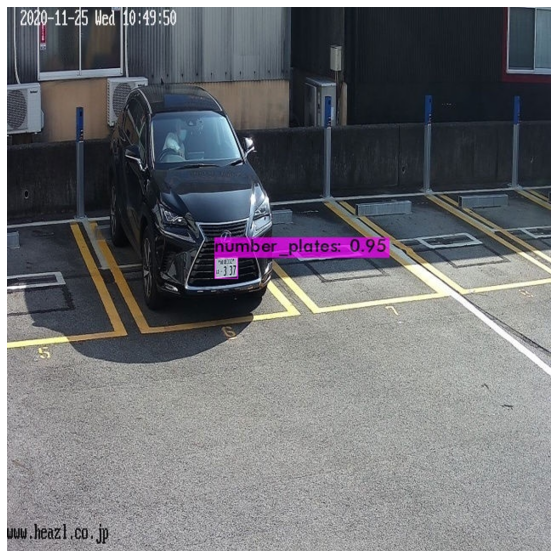


SHOWING TOTAL NUMBER OF LICENSE PLATES IN DETECTED IMAGE...


There is 1 plates in the detected image...
Processed image saved successfully to darknet/dest folder...


DETECTING YELLOW PLATES BY EXTRACTING THE RGB PIXEL VALUES...
There is 0 yellow license plates present in the processed image


<Figure size 1440x720 with 0 Axes>

In [ ]:
if __name__=="__main__":
  initial=time.time()
  enter_image_name=input("CHOOSE THE IMAGES WITHIN test_data FOLDER ex:(1.jpg,2.jpg,3.jpg...136.jpg)-->")
  cprint(f"Testing started for {enter_image_name}","green",attrs=["bold"])
  YOLO().test(enter_image_name)
  cprint("Showing performance MAP(mean average precision)","green",attrs=["bold"])
  !./darknet detector map data/main.data cfg/yolov4-custom.cfg /content/drive/MyDrive/yolov4_final/darknet/backup/yolov4-custom_best.weights -points 0
  cprint(f"Took {time.time()-initial} seconds to process...","red",attrs=["bold"])
  cprint("SHOWING RESULTS FOR PROCESSED IMAGE...","green",attrs=["bold"])
  YOLO().imshow(enter_image_name)
  os.makedirs("yellow_plates",exist_ok=True)
  cprint("DETECTING YELLOW PLATES BY EXTRACTING THE RGB PIXEL VALUES...","blue",attrs=["underline"])
  IMAGE_DIRECTORY = 'result_img'
  COLORS = {'YELLOW': [255, 255, 0]} #extracting the yellow color by rgb pixel values
  images = []
  for file in os.listdir(IMAGE_DIRECTORY):
          if not file.startswith('.'):
              images.append(YOLO().get_image(os.path.join(IMAGE_DIRECTORY, file)))
  plt.figure(figsize=(20, 10))
  YOLO().show_selected_images(images, COLORS['YELLOW'], 90, 5)
  dir=glob.glob("yellow_plates/*.jpg")
  for yellow_plate_dir in dir:
    os.remove(yellow_plate_dir)

Minimum requirements:                                               
Modern Operating System                                               
x86 64-bit CPU (Intel / AMD architecture)                            
4 GB RAM                                                          
Good internet connectivity                                           
Google account                                              
Google drive with maximum 5gb space.                              

To test the complete python obj detection code please use google colab since it has linux environment enabled and also it provides free powerful gpu's which helps in faster execution of the code.

The python version used for building this project is 3.7.12

Libraries used for building this project:
OpenCv
numpy
sklearn
matplotlib
cv2_imshow
skimage
Collections
google_colab

The complete code is implemented as per the PEP3 standards and modular coding practices are performed.

So in order to build this project i have experimented with 2 different models they are ssd i.e single shot detector and yolov4 i.e you only look once algorithm compared to these two yolov4 performed the best which gave mean average precision of 97.56%.

I have made some modifications while building this project so basically i have used darknet yolov4 model for completely building this project.
The modifications i made are as follows:
1.After training the model i only needed cropped image of the license plates so i have written a snippet C program inside the darknet/src/image.c which helped me to crop the particular bounding boxes that has been predicted by my model.
2.added a custom number plate images which has been scrapped through interne.
3.made main.data file inside darknet/data/ folder which consists of the path of the main file.
4.made main.names file inside the darknet/data/ folder which consists of the label names i.e number_plates
5.changed the yolov4 algorithm parameters for better prediction and accuracy
the modification is made on yolov4-custom.cfg file 

max_batches=6000 because we have only one class 
steps=4800,5400 
4800 because as per the documentation of yolov4 we have to take 80% 6000 and 90% of 6000 
modified filters and set it to 18 which are just above the yolo layers since in yolov4 there are 3 yolo layers so changed filters 3 times and set it to 18.

So baically these are some modifications done inside the darknet folder.
